# Chicago Taxi Trips

### Data
https://data.cityofchicago.org/Transportation/Taxi-Trips/wrvz-psew/data

### Objective

The cost of a taxi ride is frequently a surprise, as it is determined by a variety of factors that cannot be predicted in advance. Customers pay in a variety of ways depending on a variety of factors.

In this research, my goal is to use this dataset to forecast the typical payment mode for a trip using just information available ahead of time. Because this is a learning project, I will only use data from the year 2013 within 25 miles.

### Data Description
1. (Trip ID)
2. (Taxi ID)
3. (Trip Start Timestamp) 
          -- Trip start time  
4. (Trip End Timestamp)
          -- Trip end time
5. (Trip Seconds) 
6. (Trip Miles) 
7. (Pickup Census Tract) (Uniquely numbered in each county with a. numeric code)
          -- Pickup tract code
8. (Dropoff Census Tract) ((Uniquely numbered in each county with a. numeric code)
          -- Dropoff tract code
9. (Pickup Community Area)
10. (Dropoff Community Area)
11. (Fare) 
12. (Tips) 
13. (Tolls) 
14. (Extras) 
15. (Trip Total)
          -- Fare + Tips + Tolls + Extras  
16. (Payment Type)
17. (Company)
          -- Car manufacturer
18. (Pickup Centroid Latitude) 
          -- Pickup latitude  
19. (Pickup Centroid Longitude) 
          -- Pickup longitude  
20. (Pickup Centroid Location)
         -- Pickup location  
21. (Dropoff Centroid Latitude)
         -- Dropoff latitude  
22. (Dropoff Centroid Longitude)
         -- Dropoff longitude   
23. (Dropoff Centroid  Location)
         -- Dropoff location  

# Basic Analysis

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

### In chunk 1, Collect data within 25 miles of the year 2013 

In [2]:
raw_data=pd.read_csv("Taxi_Trips.csv",low_memory=False,chunksize=100000)
#print(raw_data)

dfList = []
for i in raw_data:
    dfList.append(i)
    break
    
df = pd.concat(dfList,sort=False)

#Considering trip miles below 25
df['Trip Start Timestamp'] = pd.to_datetime(df['Trip Start Timestamp'], errors='coerce')
new_df=df[(df['Trip Miles']<=25) & (df['Trip Start Timestamp'].dt.year==2013)]

In [3]:
new_df.to_csv("data/TaxiTrips_filtered.csv")

### Working with new data file

In [4]:
TaxiTrips=pd.read_csv("data/TaxiTrips_filtered.csv",low_memory=False)
TaxiTrips.head()

,Unnamed: 0,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,0,b7d23cac08d48cc108e9e1bdf70f83aa9de74ad4,482034a97107d225bd4b283155de3e189aaac4cf24c3b7...,2013-12-17 23:30:00,12/17/2013 11:45:00 PM,1260.0,0.0,1.703198e+10,1.703128e+10,76.0,...,2.0,36.85,Cash,Taxi Affiliation Services,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.879255,-87.642649,POINT (-87.642648998 41.8792550844)
1,4,99b9e6196e7821d89335220602c9de0d0a6b2289,b15d5dba7f578c2e93e08c66d7a9b57bc35c9f316265cb...,2013-12-18 10:00:00,12/18/2013 10:15:00 AM,540.0,0.0,1.703184e+10,1.703184e+10,32.0,...,1.0,7.45,Cash,Taxi Affiliation Services,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)
2,8,ec1d991af8074b174a7ea55fccd069c93ba58a76,57205891344c28e84db17ff95e12c3b2d5050af72cd48c...,2013-11-29 17:45:00,11/29/2013 06:15:00 PM,2400.0,0.0,1.703198e+10,1.703108e+10,76.0,...,2.0,38.45,Cash,Taxi Affiliation Services,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365)
3,12,61ccf5dbfa84a90ca4e66d82b3a59590468bf968,fc4ee6b2bbcda6cbc48b7fa94b2cec5763df3b0de55496...,2013-12-23 20:45:00,12/23/2013 09:00:00 PM,1020.0,4.1,1.703128e+10,1.703106e+10,28.0,...,0.0,12.65,Cash,Choice Taxi Association,41.885300,-87.642808,POINT (-87.6428084655 41.8853000224),41.938232,-87.646782,POINT (-87.6467820813 41.938232293)
4,13,9c78035a487be84ecc2caabb44fcc37621f89a0d,d4c368cfbdf275c50fdde77679e391b36ea17bf9ed9d48...,2013-12-22 12:00:00,12/22/2013 12:15:00 PM,300.0,0.0,1.703108e+10,1.703108e+10,8.0,...,0.0,5.45,Cash,Taxi Affiliation Services,41.899156,-87.626211,POINT (-87.6262105324 41.8991556134),41.909496,-87.630964,POINT (-87.630963601 41.9094956686)


### Drop Unnamed columns

In [5]:
TaxiTrips=TaxiTrips.drop("Unnamed: 0",axis=1)

### Information about a DataFrame

In [6]:
TaxiTrips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24018 entries, 0 to 24017
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Trip ID                     24018 non-null  object 
 1   Taxi ID                     24018 non-null  object 
 2   Trip Start Timestamp        24018 non-null  object 
 3   Trip End Timestamp          24008 non-null  object 
 4   Trip Seconds                23031 non-null  float64
 5   Trip Miles                  24018 non-null  float64
 6   Pickup Census Tract         14950 non-null  float64
 7   Dropoff Census Tract        14811 non-null  float64
 8   Pickup Community Area       21447 non-null  float64
 9   Dropoff Community Area      21018 non-null  float64
 10  Fare                        24018 non-null  float64
 11  Tips                        24018 non-null  float64
 12  Tolls                       24018 non-null  float64
 13  Extras                      240

### Dimensionalities of the DataFrame

In [7]:
print("Number of rows ",TaxiTrips.shape[0])
print("Number of Columns ",TaxiTrips.shape[1])

Number of rows  24018
Number of Columns  23


### Histograms of features in the DataFrame

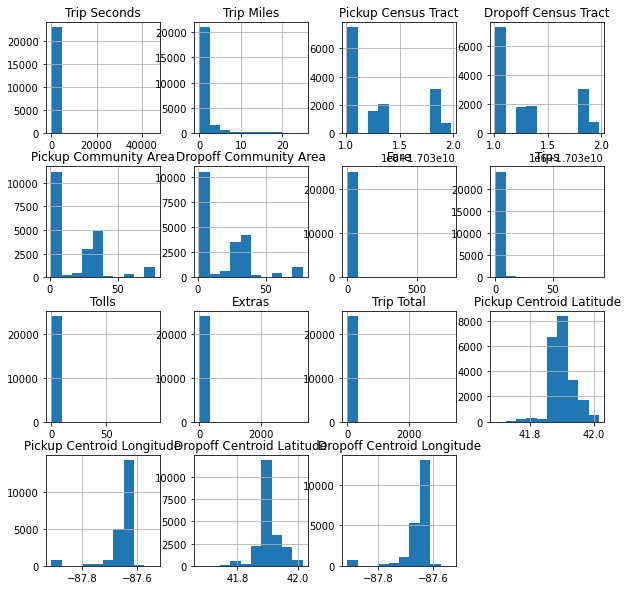

In [8]:
plt.rcParams["figure.figsize"] = (10,10)
TaxiTrips.hist()
plt.show()

- There don't appear to be any obvious data quality issues.   
- We'll need to standardize the features because we'll have more numerical, but on different scales.

### Descriptive statistics of a Dataframe

In [9]:
TaxiTrips.describe()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,23031.000000,24018.000000,1.495000e+04,1.481100e+04,21447.000000,21018.000000,24018.000000,24018.000000,24018.000000,24018.000000,24018.000000,21447.000000,21447.000000,21046.000000,21046.000000
mean,687.792106,1.255650,1.703133e+10,1.703134e+10,20.792512,20.909839,11.145364,0.885607,0.005022,0.863468,12.899462,41.902721,-87.652410,41.902691,-87.655172
std,713.604746,3.030631,3.272687e+05,3.277042e+05,17.966532,17.765085,10.496024,2.118877,0.608693,26.356673,28.984875,0.036555,0.056687,0.038882,0.056843
min,0.000000,0.000000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.690633,-87.913625,41.673820,-87.913625
25%,300.000000,0.000000,1.703108e+10,1.703108e+10,8.000000,8.000000,5.850000,0.000000,0.000000,0.000000,6.450000,41.880994,-87.655998,41.880994,-87.657005
50%,540.000000,0.000000,1.703108e+10,1.703124e+10,8.000000,8.000000,7.650000,0.000000,0.000000,0.000000,8.750000,41.893216,-87.633308,41.893216,-87.635891
75%,840.000000,1.100000,1.703183e+10,1.703183e+10,32.000000,32.000000,11.850000,1.000000,0.000000,1.000000,13.250000,41.922083,-87.626215,41.922686,-87.626215
max,45660.000000,24.900000,1.703198e+10,1.703198e+10,77.000000,77.000000,746.250000,90.000000,94.000000,3334.830000,3343.880000,42.015697,-87.534903,42.016011,-87.534903


### Missing values

In [10]:
TaxiTrips.isnull().sum()

Trip ID                          0
Taxi ID                          0
Trip Start Timestamp             0
Trip End Timestamp              10
Trip Seconds                   987
Trip Miles                       0
Pickup Census Tract           9068
Dropoff Census Tract          9207
Pickup Community Area         2571
Dropoff Community Area        3000
Fare                             0
Tips                             0
Tolls                            0
Extras                           0
Trip Total                       0
Payment Type                     0
Company                          0
Pickup Centroid Latitude      2571
Pickup Centroid Longitude     2571
Pickup Centroid Location      2571
Dropoff Centroid Latitude     2972
Dropoff Centroid Longitude    2972
Dropoff Centroid  Location    2972
dtype: int64

### Frequency of missing values

In [11]:
freq=TaxiTrips.isna().sum()/(len(TaxiTrips))*100
freq

Trip ID                        0.000000
Taxi ID                        0.000000
Trip Start Timestamp           0.000000
Trip End Timestamp             0.041635
Trip Seconds                   4.109418
Trip Miles                     0.000000
Pickup Census Tract           37.755017
Dropoff Census Tract          38.333750
Pickup Community Area         10.704472
Dropoff Community Area        12.490632
Fare                           0.000000
Tips                           0.000000
Tolls                          0.000000
Extras                         0.000000
Trip Total                     0.000000
Payment Type                   0.000000
Company                        0.000000
Pickup Centroid Latitude      10.704472
Pickup Centroid Longitude     10.704472
Pickup Centroid Location      10.704472
Dropoff Centroid Latitude     12.374053
Dropoff Centroid Longitude    12.374053
Dropoff Centroid  Location    12.374053
dtype: float64

### Visualizing missing values

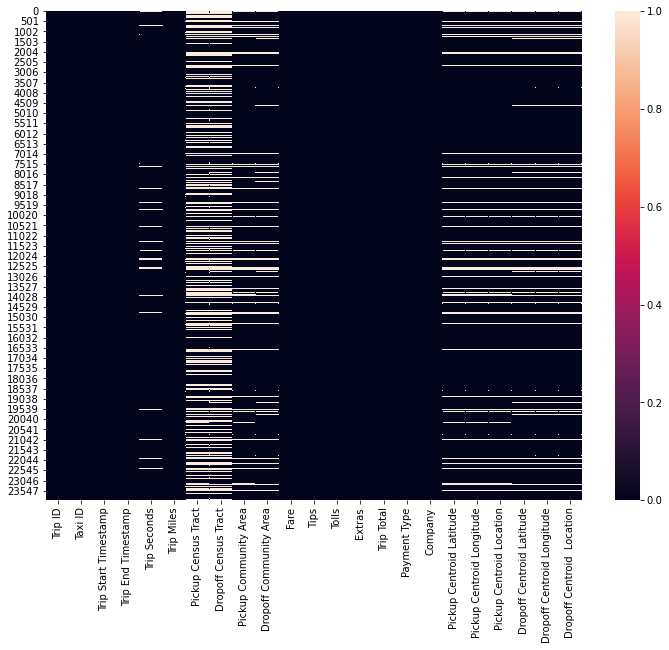

In [12]:
plt.figure(figsize=(12,9))
sns.heatmap(TaxiTrips.isna())
plt.show()

- Here I assume that a trip is considered valid if it has non zero miles. <b>Other columns are handled with pipeline.</b>
- We don't need to rename column names because we already have appropriate names.

In [13]:
TaxiTrips = TaxiTrips[TaxiTrips['Trip Miles'] > 0.0]

### Check the data types

In [14]:
TaxiTrips.dtypes

Trip ID                        object
Taxi ID                        object
Trip Start Timestamp           object
Trip End Timestamp             object
Trip Seconds                  float64
Trip Miles                    float64
Pickup Census Tract           float64
Dropoff Census Tract          float64
Pickup Community Area         float64
Dropoff Community Area        float64
Fare                          float64
Tips                          float64
Tolls                         float64
Extras                        float64
Trip Total                    float64
Payment Type                   object
Company                        object
Pickup Centroid Latitude      float64
Pickup Centroid Longitude     float64
Pickup Centroid Location       object
Dropoff Centroid Latitude     float64
Dropoff Centroid Longitude    float64
Dropoff Centroid  Location     object
dtype: object

### Changing data types

In [15]:
TaxiTrips['Trip Start Timestamp'] = pd.to_datetime(TaxiTrips['Trip Start Timestamp'], errors='coerce')
TaxiTrips['Trip End Timestamp'] = pd.to_datetime(TaxiTrips['Trip End Timestamp'], errors='coerce')
TaxiTrips['Trip Miles'] = pd.to_numeric(TaxiTrips['Trip Miles'], errors='coerce')

### Split timestamps into usable components

In [16]:
TaxiTrips['Date']=TaxiTrips['Trip Start Timestamp'].dt.day
TaxiTrips['Month']=TaxiTrips['Trip Start Timestamp'].dt.month
TaxiTrips['Weekday'] = TaxiTrips['Trip Start Timestamp'].dt.weekday+1
TaxiTrips['Hour']=TaxiTrips['Trip Start Timestamp'].dt.hour

# Exploratory Data Analysis

### Determining payment modes

In [17]:
TaxiTrips['Payment Type'].unique() #Unique values of Payment Types

array(['Cash', 'Credit Card', 'Dispute', 'No Charge', 'Unknown'],
      dtype=object)

In [18]:
print("Number of Payment Modes",TaxiTrips['Payment Type'].nunique()) #Number of unique values of Payment Types

Number of Payment Modes 5


In [19]:
TaxiTrips['Payment Type'].value_counts() #Counts of unique rows in Payment Type column

Cash           8316
Credit Card    2780
No Charge       148
Dispute          26
Unknown          18
Name: Payment Type, dtype: int64

### Usual Payment Mode

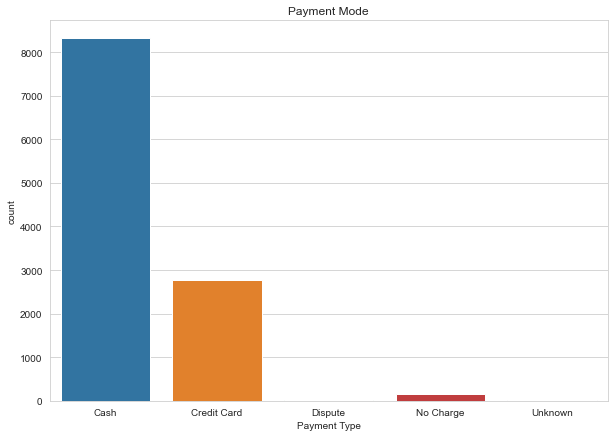

In [20]:
plt.figure(figsize=(10,7))
sns.set_style("whitegrid")
sns.countplot(x="Payment Type",data=TaxiTrips)
plt.title("Payment Mode")
plt.show()

- The majority of the payments were made using cash or a credit card.

### Company distribution based on payment method

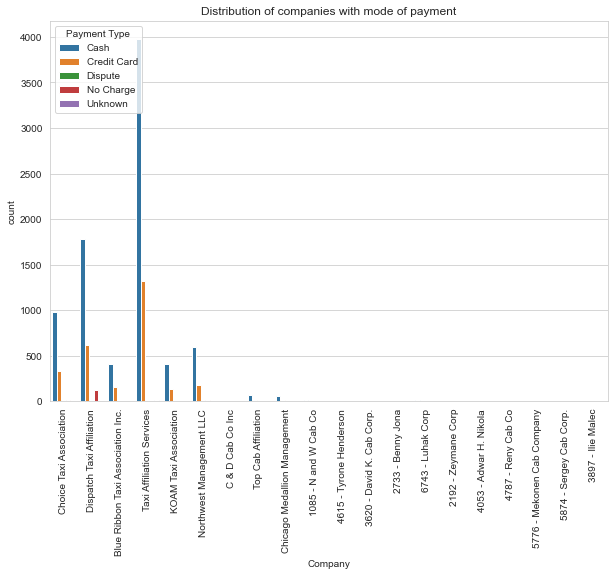

In [21]:
plt.figure(figsize=(10,7))
sns.set_style("whitegrid")
sns.countplot(x="Company",data=TaxiTrips,hue="Payment Type")
plt.title("Distribution of companies with mode of payment")
plt.xticks(rotation=90)
plt.show()

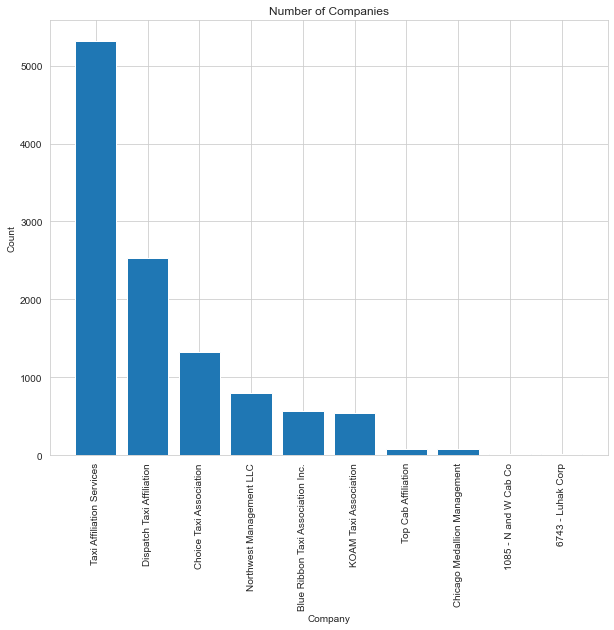

In [22]:
x = TaxiTrips['Company'].value_counts().index.values.astype('str')[:10]
y = TaxiTrips['Company'].value_counts().values[:10]
plt.figure(figsize = (10,8))
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.xlabel("Company")
plt.ylabel("Count")
plt.title("Number of Companies")
plt.show()

- The majority of individuals relied on Taxi Affiliation Services for transportation.

### Distribution of Trip duration

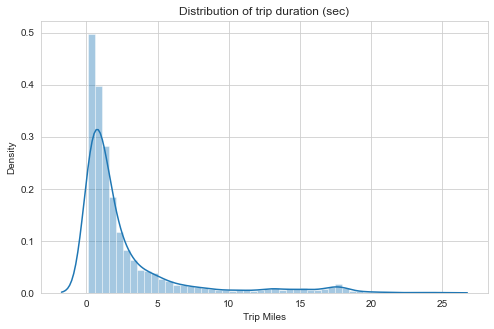

In [23]:
plt.figure(figsize=(8,5))
sns.distplot(TaxiTrips['Trip Miles']).set_title("Distribution of Trip Duration")
plt.title("Distribution of trip duration (sec)")
plt.show()

- Obviously, the majority of the journeys are short.

### Which company earned more?

In [24]:
annual_revenues = TaxiTrips[['Trip Total', 'Company']].groupby('Company').sum()
annual_revenues.sort_values(by='Trip Total', inplace=True, ascending=False)
annual_revenues

,Trip Total
Company,
Taxi Affiliation Services,77230.31
Dispatch Taxi Affiliation,28231.73
Choice Taxi Association,15038.94
Blue Ribbon Taxi Association Inc.,9314.60
Northwest Management LLC,9096.26
KOAM Taxi Association,6792.23
Top Cab Affiliation,953.75
Chicago Medallion Management,862.40
1085 - N and W Cab Co,113.75


<Figure size 720x504 with 0 Axes>

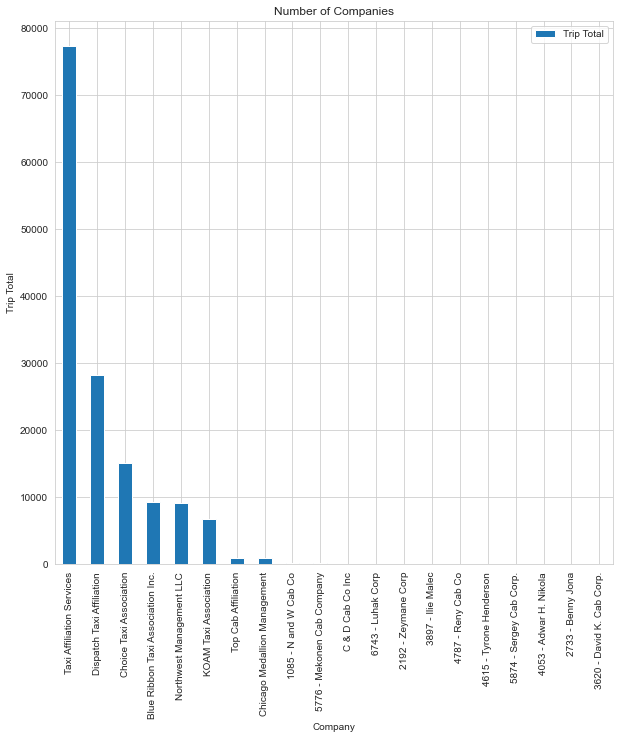

In [25]:
plt.figure(figsize = (10,7))
annual_revenues.plot.bar()
plt.xticks(rotation = 90)
plt.xlabel("Company")
plt.ylabel("Trip Total")
plt.title("Number of Companies")
plt.show()

- Taxi affliation services earned more revenue.

### Distribution of Trips by date


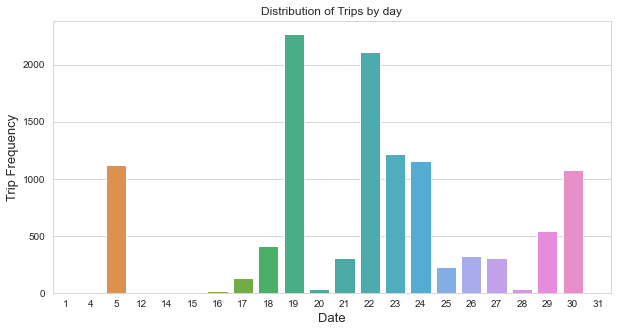

In [26]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.countplot(x="Date",data=TaxiTrips)
plt.title("Distribution of Trips by day")
plt.xlabel("Date",fontsize=13)
plt.ylabel("Trip Frequency", fontsize=13)
plt.show()

- The majority of journeys commence in the middle of the month.

### Distribution of Trips by hour

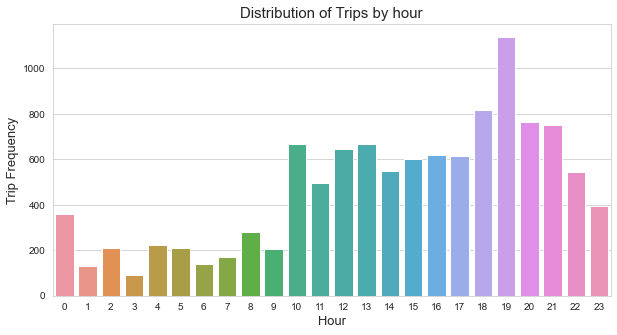

In [27]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.countplot(x="Hour",data=TaxiTrips)
plt.title('Distribution of Trips by hour', fontsize=15)
plt.xlabel("Hour",fontsize=13)
plt.ylabel("Trip Frequency", fontsize=13)
plt.show()

- Generally, The majority of the trips takes place from 10 a.m.

### Distribution of Trips by Days

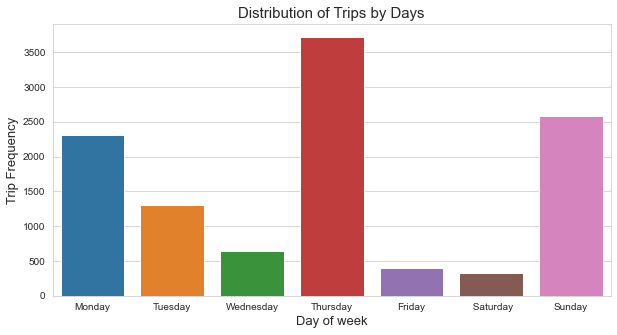

In [28]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
fig=sns.countplot(x="Weekday",data=TaxiTrips)
plt.title('Distribution of Trips by Days', fontsize=15)
plt.xlabel("Day of week",fontsize=13)
plt.ylabel("Trip Frequency", fontsize=13)
labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',' Saturday', 'Sunday']
fig.set_xticklabels(labels)
plt.show()

- On Thursday, the majority of the trips took place.

### Distribution of trip fare

In [29]:
print("Minimum fare",TaxiTrips["Fare"].min())
print("Maximum fare",TaxiTrips["Fare"].max())

Minimum fare 0.0
Maximum fare 134.05


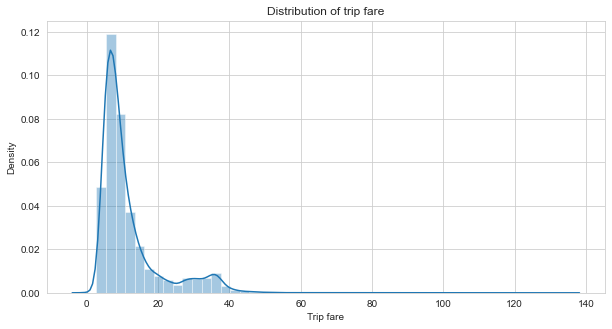

In [30]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.distplot(TaxiTrips["Fare"])
plt.title("Distribution of trip fare")
plt.xlabel("Trip fare")
plt.ylabel("Density")
plt.show()

- Here we have some heavy outliers. If we just remove the 0.4% most expensive trips:

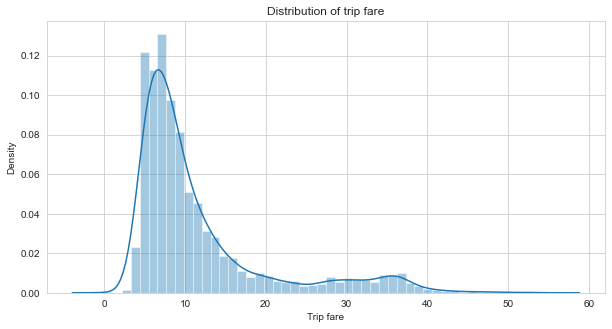

In [31]:
TaxiTrips = TaxiTrips[TaxiTrips["Fare"]<=55]
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.distplot(TaxiTrips["Fare"])
plt.title("Distribution of trip fare")
plt.xlabel("Trip fare")
plt.ylabel("Density")
plt.show()

- Obviously, the majority of the journeys are cheap.

### Location range

In [32]:
print('Pickup longitude range: [{},{}]'.format(np.min(TaxiTrips['Pickup Centroid Longitude']), np.max(TaxiTrips['Pickup Centroid Longitude'])))
print('Pickup latitude range: [{},{}]'.format(np.min(TaxiTrips['Pickup Centroid Latitude']), np.max(TaxiTrips['Pickup Centroid Latitude'])))
print('Dropoff longitude range: [{},{}]'.format(np.min(TaxiTrips['Dropoff Centroid Longitude']), np.max(TaxiTrips['Dropoff Centroid Longitude'])))
print('Dropoff latitude range: [{},{}]'.format(np.min(TaxiTrips['Dropoff Centroid Latitude']), np.max(TaxiTrips['Dropoff Centroid Latitude'])))

Pickup longitude range: [-87.913624596,-87.551428197]
Pickup latitude range: [41.690633346999995,42.009622881]
Dropoff longitude range: [-87.913624596,-87.551428197]
Dropoff latitude range: [41.673819904,42.016010564]


#### Pickup coordinates


<Figure size 720x360 with 0 Axes>

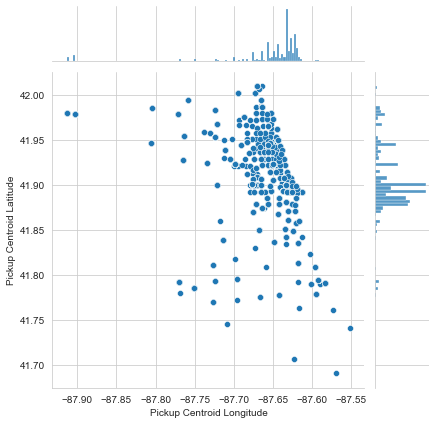

In [33]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.jointplot(y="Pickup Centroid Latitude", x="Pickup Centroid Longitude", data=TaxiTrips)
plt.show()

#### Dropoff coordinates

<Figure size 720x360 with 0 Axes>

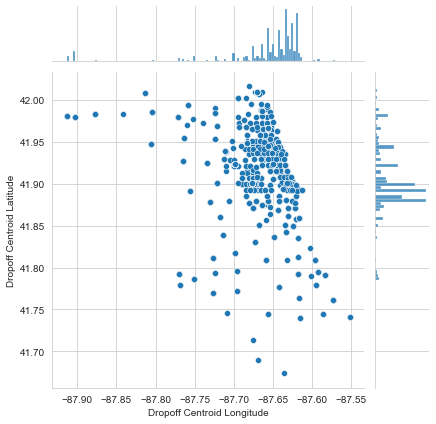

In [34]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.jointplot(y="Dropoff Centroid Latitude", x="Dropoff Centroid Longitude", data=TaxiTrips)
plt.show()

- This plot appears to be identical to the pick up case.

#### Pickup community area

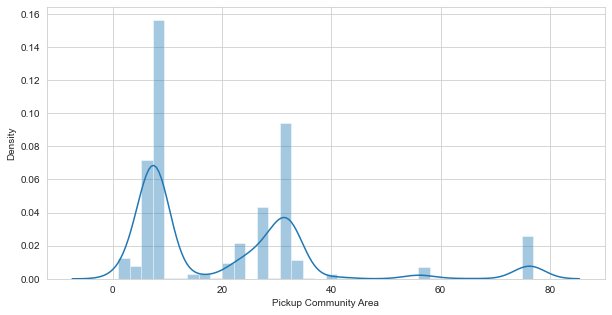

In [35]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.distplot(TaxiTrips["Pickup Community Area"])
plt.show()

#### Dropoff community area

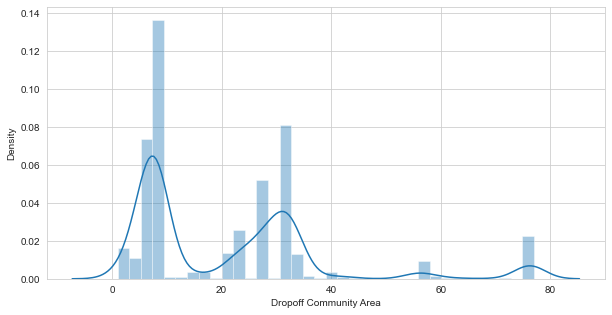

In [36]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.distplot(TaxiTrips["Dropoff Community Area"])
plt.show()

### Correlation

In [37]:
TaxiTrips.corr()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Date,Month,Weekday,Hour
Trip Seconds,1.000000,0.534239,0.218117,0.195010,0.289880,0.293674,0.862597,0.337103,0.028982,0.267945,0.832675,0.111397,-0.400548,0.088226,-0.425270,-0.123603,-0.050570,0.003027,0.038667
Trip Miles,0.534239,1.000000,0.162029,0.197516,0.247923,0.278371,0.663140,0.257268,0.054074,0.235310,0.644571,0.112780,-0.355741,0.081272,-0.387209,-0.013294,-0.019813,0.017215,-0.037181
Pickup Census Tract,0.218117,0.162029,1.000000,-0.007212,0.744445,-0.020637,0.246702,0.151398,0.023510,0.101907,0.250407,-0.136393,-0.461581,-0.015779,0.016449,-0.095639,-0.001732,-0.055393,0.067916
Dropoff Census Tract,0.195010,0.197516,-0.007212,1.000000,-0.000141,0.727713,0.256913,0.108528,NaN,0.096299,0.251525,-0.052073,0.037956,-0.189704,-0.465438,0.016068,-0.025434,-0.043636,-0.112415
Pickup Community Area,0.289880,0.247923,0.744445,-0.000141,1.000000,0.054435,0.362363,0.193627,0.055314,0.210454,0.374516,-0.046209,-0.607859,-0.051335,-0.006322,-0.053139,-0.003375,-0.029843,0.077029
Dropoff Community Area,0.293674,0.278371,-0.020637,0.727713,0.054435,1.000000,0.410210,0.144028,NaN,0.187895,0.404212,-0.080299,0.020216,-0.172267,-0.572402,0.032824,-0.009133,-0.026172,-0.102098
Fare,0.862597,0.663140,0.246702,0.256913,0.362363,0.410210,1.000000,0.400749,0.040360,0.358203,0.974602,0.149198,-0.500005,0.125585,-0.569425,-0.040578,-0.047058,0.016488,-0.048043
Tips,0.337103,0.257268,0.151398,0.108528,0.193627,0.144028,0.400749,1.000000,0.005731,0.184875,0.545028,0.065684,-0.253860,0.052800,-0.211909,-0.098370,-0.033413,0.004616,0.005795
Tolls,0.028982,0.054074,0.023510,NaN,0.055314,NaN,0.040360,0.005731,1.000000,0.061382,0.049327,0.038028,-0.080575,NaN,NaN,0.007790,0.002347,0.003811,0.020132
Extras,0.267945,0.235310,0.101907,0.096299,0.210454,0.187895,0.358203,0.184875,0.061382,1.000000,0.494114,0.037278,-0.280326,-0.004962,-0.239754,0.019432,-0.022602,0.030356,0.008195


<AxesSubplot:>

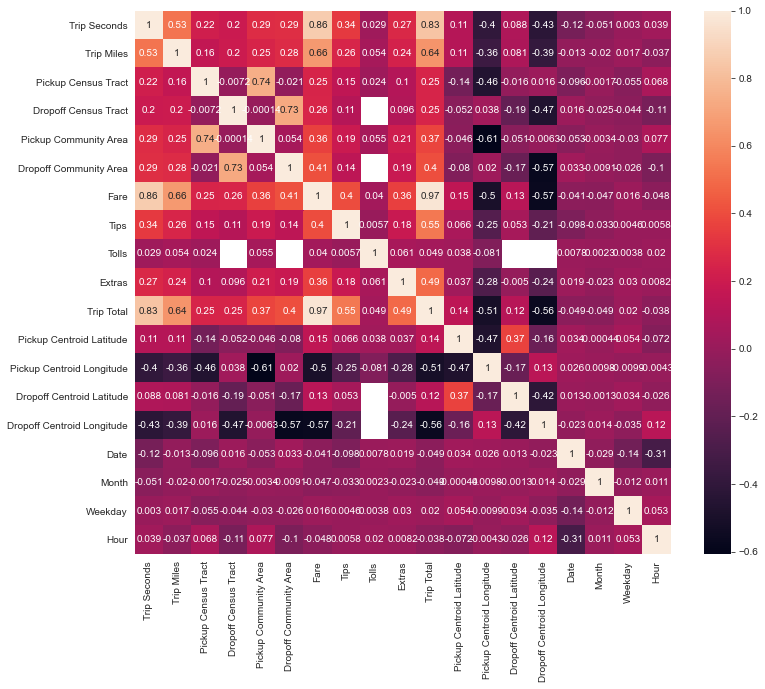

In [38]:
plt.figure(figsize=(12,10))
sns.heatmap(TaxiTrips.corr(),annot=True)

- Thus we see that some features has high correlation with other features and some are not correlated at all.

### Feature Selection

* Since we are restricting the problem data to that which can be obtained before taking a taxi, we are gonna drop all but those variables.  

* We have two factors derived from the location: census and community area. Because for privacy reasons some census tracks are missing, we are not going to use that factor.  

* As for the target variable, we are only considering the 'Payment Type'.

In [39]:
new_TaxiTrips=TaxiTrips.drop(["Trip ID","Taxi ID","Pickup Census Tract","Dropoff Census Tract",
                              "Trip Start Timestamp","Trip End Timestamp",
                              "Pickup Centroid Longitude", "Pickup Centroid Location",
       "Dropoff Centroid Latitude", "Dropoff Centroid Longitude",
       "Dropoff Centroid  Location","Pickup Centroid Latitude"],
                             axis=1)

## Model Building

In [40]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, label_binarize, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_val_score,GridSearchCV,cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score,confusion_matrix,roc_auc_score
from sklearn.metrics import roc_curve, auc,classification_report
from sklearn.model_selection import cross_validate
from sklearn.multiclass import OneVsRestClassifier

### Applying Label encoder to target variable

In [41]:
categorical_features=['Payment Type']
encoder=LabelEncoder()
new_TaxiTrips[categorical_features] = new_TaxiTrips[categorical_features].apply(encoder.fit_transform)

### Consider Payment mode as Predictor(dependent variable)

In [42]:
x=new_TaxiTrips.drop("Payment Type",axis=1)
y=new_TaxiTrips["Payment Type"]

### Split data into 2 parts, training and testing data into 70:30 ratio

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)

print("X Train sample size ",x_train.shape[0])
print("X Test sample size ",x_test.shape[0])

print("Y Train sample size ",y_train.shape[0])
print("Y Test sample size ",y_test.shape[0])

X Train sample size  7891
X Test sample size  3382
Y Train sample size  7891
Y Test sample size  3382


### Create a pipeline with numerical and categorical variables seperately, and apply column transformer

In [44]:
cat_vars=['Company']
num_vars=['Trip Seconds', 'Trip Miles', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Date', 'Month', 'Weekday', 'Hour']

num_pipeline = Pipeline([('impute_missing', SimpleImputer(missing_values = np.nan,strategy='mean')),
                           ('standardize_num', StandardScaler())])

cat_pipeline = Pipeline([('impute_missing', SimpleImputer(missing_values = np.nan ,strategy='most_frequent')),
                          ('create_dummies', OneHotEncoder(handle_unknown='ignore',sparse=False))])


processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, num_vars),
                                                      ('create_dummies', cat_pipeline, cat_vars)
                                                     ])
print(processing_pipeline)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer()),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['Trip Seconds', 'Trip Miles',
                                  'Pickup Community Area',
                                  'Dropoff Community Area', 'Fare', 'Tips',
                                  'Tolls', 'Extras', 'Trip Total', 'Date',
                                  'Month', 'Weekday', 'Hour']),
                                ('create_dummies',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies',
                                                  OneHotEn

In [45]:
p1 = Pipeline([('processing', processing_pipeline),
               ('LogisticRegression', LogisticRegression(penalty='l2', C=0.01, solver='lbfgs', random_state=1, max_iter=1000,multi_class='auto'))])

p2 = Pipeline([('processing', processing_pipeline),
               ('DecisionTree', DecisionTreeClassifier(max_depth=2, criterion='entropy'))])

p3 = Pipeline([('processing', processing_pipeline),
               ('SVC', SVC(kernel='rbf',C=1, probability=True))])

labs = ['Logistic Regression', 'Decision Tree', 'SVM']
clfs = [p1, p2, p3]
clfs = zip(labs, clfs)

algorithms=[]
accuracy=[]

for lab, clf in clfs:
    scores = cross_val_score(estimator=clf, X=x_train, y=y_train, cv=10)
    print(f'Accuracy {scores.mean():.2%} [{lab}]')
    algorithms.append(lab)
    accuracy.append(scores.mean())

Accuracy 94.70% [Logistic Regression]
Accuracy 97.25% [Decision Tree]
Accuracy 96.93% [SVM]


In [46]:
models = pd.DataFrame(algorithms, columns=['algorithms'])
models['accuracy']=accuracy
models.head()

,algorithms,accuracy
0,Logistic Regression,0.947027
1,Decision Tree,0.972500
2,SVM,0.969332


### Ensemble methods
Ensemble approaches combine several models to produce a superior one. Active results are usually better and less overfitting, thus I'm expecting active results to be better than the previous ones.

In [47]:
from sklearn.ensemble import VotingClassifier

ems = [('lr', p1),('dc', p2),('svc', p3)]
clf4 = VotingClassifier(estimators= ems, weights=None, voting='soft')

scores = cross_val_score(estimator=clf4, X=x_train, y=y_train, cv=10, scoring='accuracy')
print(f'Accuracy {scores.mean():.2%} [Ensemble]')

Accuracy 97.12% [Ensemble]


### HyperParameter Tuning

In [48]:
from sklearn.model_selection import GridSearchCV

params = {'lr__LogisticRegression__C':[10,20,30], 
          'lr__LogisticRegression__solver':['lbfgs'],
          'lr__LogisticRegression__penalty':['l2'],
          'dc__DecisionTree__max_depth': [2,5,6],
          'dc__DecisionTree__criterion': ['gini','entropy'],
          'svc__SVC__C':[1,5],
          'svc__SVC__kernel':['linear','rbf']
         }

vc_gs = GridSearchCV(estimator=clf4, param_grid=params, scoring='accuracy', refit=True, cv=5)
vc_gs = vc_gs.fit(x_train, y_train)
vc_gs_score = vc_gs.score(x_test, y_test)

print(f'VotingClassifier Test Accuracy: {vc_gs_score:.2%}')

VotingClassifier Test Accuracy: 97.55%


In [49]:
vc_gs.best_params_

{'dc__DecisionTree__criterion': 'gini',
 'dc__DecisionTree__max_depth': 6,
 'lr__LogisticRegression__C': 30,
 'lr__LogisticRegression__penalty': 'l2',
 'lr__LogisticRegression__solver': 'lbfgs',
 'svc__SVC__C': 1,
 'svc__SVC__kernel': 'linear'}

### Logistic Regression

In [50]:
clf = p1
clf.fit(x_train,y_train)

clf_test_predict = clf.predict(x_test)
clf_test_score = accuracy_score(y_test, clf_test_predict)

print(f'Logistic Regression Test Score: {clf_test_score:.2%}')

Logistic Regression Test Score: 94.83%


In [51]:
confusion_matrix(y_test, clf_test_predict)

array([[2488,    0,    0,    0,    0],
       [ 124,  719,    0,    0,    0],
       [   8,    0,    0,    0,    0],
       [  39,    0,    0,    0,    0],
       [   3,    1,    0,    0,    0]])

In [52]:
print('\nClassification Report\n')
print(classification_report(y_test, clf_test_predict))


Classification Report

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      2488
           1       1.00      0.85      0.92       843
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        39
           4       0.00      0.00      0.00         4

    accuracy                           0.95      3382
   macro avg       0.39      0.37      0.38      3382
weighted avg       0.94      0.95      0.94      3382



In [53]:
print("Overall Accuracy:",accuracy_score(y_test, clf_test_predict))
print("Overall Precision:",precision_score(y_test, clf_test_predict, average='macro'))
print("Overall Recall:",recall_score(y_test, clf_test_predict, average='macro'))

Overall Accuracy: 0.9482554701360142
Overall Precision: 0.3866493446865348
Overall Recall: 0.3705812574139976


In [54]:
y_prob = clf.predict_proba(x_test)

macro_roc_auc_ovo1 = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo1 = roc_auc_score(
    y_test, y_prob, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovr1 = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr1 = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo1, weighted_roc_auc_ovo1)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr1, weighted_roc_auc_ovr1)
)

roc_ovo=[]
roc_ovr=[]
roc_ovo.append(macro_roc_auc_ovo1)
roc_ovr.append(macro_roc_auc_ovr1)

One-vs-One ROC AUC scores:
0.753874 (macro),
0.796139 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.842380 (macro),
0.972607 (weighted by prevalence)


### Decision Tree

In [55]:
tree = p2
tree = tree.fit(x_train, y_train)

tree_test_predict = tree.predict(x_test)
tree_test_score = accuracy_score(y_test, tree_test_predict)

print(f'Tree Test Score: {tree_test_score:.2%}')

Tree Test Score: 97.66%


In [56]:
confusion_matrix(y_test, tree_test_predict)

array([[2488,    0,    0,    0,    0],
       [  28,  815,    0,    0,    0],
       [   8,    0,    0,    0,    0],
       [  39,    0,    0,    0,    0],
       [   3,    1,    0,    0,    0]])

In [57]:
print('\nClassification Report\n')
print(classification_report(y_test, tree_test_predict))


Classification Report

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2488
           1       1.00      0.97      0.98       843
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        39
           4       0.00      0.00      0.00         4

    accuracy                           0.98      3382
   macro avg       0.39      0.39      0.39      3382
weighted avg       0.96      0.98      0.97      3382



In [58]:
print("Overall Accuracy:",accuracy_score(y_test, tree_test_predict))
print("Overall Precision:",precision_score(y_test, tree_test_predict, average='macro'))
print("Overall Recall:",recall_score(y_test, tree_test_predict, average='macro'))

Overall Accuracy: 0.9766410408042578
Overall Precision: 0.3936754007916495
Overall Recall: 0.3933570581257414


In [59]:
y_prob = tree.predict_proba(x_test)

macro_roc_auc_ovo2 = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo2 = roc_auc_score(
    y_test, y_prob, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovr2 = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr2 = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo2, weighted_roc_auc_ovo2)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr2, weighted_roc_auc_ovr2)
)
roc_ovo.append(macro_roc_auc_ovo2)
roc_ovr.append(macro_roc_auc_ovr2)

One-vs-One ROC AUC scores:
0.694978 (macro),
0.754881 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.771465 (macro),
0.971735 (weighted by prevalence)


### Support Vector Classifier

In [60]:
svc = p3
svc = svc.fit(x_train, y_train)

svc_test_predict = svc.predict(x_test)
svc_test_score = accuracy_score(y_test, svc_test_predict)

print(f'Tree Test Score: {svc_test_score:.2%}')

Tree Test Score: 97.28%


In [61]:
confusion_matrix(y_test, svc_test_predict)

array([[2488,    0,    0,    0,    0],
       [  41,  802,    0,    0,    0],
       [   8,    0,    0,    0,    0],
       [  39,    0,    0,    0,    0],
       [   3,    1,    0,    0,    0]])

In [62]:
print('\nClassification Report\n')
print(classification_report(y_test, svc_test_predict))


Classification Report

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2488
           1       1.00      0.95      0.97       843
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        39
           4       0.00      0.00      0.00         4

    accuracy                           0.97      3382
   macro avg       0.39      0.39      0.39      3382
weighted avg       0.96      0.97      0.97      3382



In [63]:
y_prob = svc.predict_proba(x_test)

macro_roc_auc_ovo3 = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo3 = roc_auc_score(
    y_test, y_prob, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovr3 = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr3 = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo3, weighted_roc_auc_ovo3)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr3, weighted_roc_auc_ovr3)
)
roc_ovo.append(macro_roc_auc_ovo3)
roc_ovr.append(macro_roc_auc_ovr3)

One-vs-One ROC AUC scores:
0.712900 (macro),
0.754753 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.776868 (macro),
0.971031 (weighted by prevalence)


# Results

In [64]:
models['One Vs One AUC']=roc_ovo
models['One Vs Rest AUC']=roc_ovr
models.head()

,algorithms,accuracy,One Vs One AUC,One Vs Rest AUC
0,Logistic Regression,0.947027,0.753874,0.842380
1,Decision Tree,0.972500,0.694978,0.771465
2,SVM,0.969332,0.712900,0.776868


- I have choosen AUC metric because, here each and every class in the target variable plays major role with their own importance. Ex: Some people still use cash as they wont trust on credit cards and some others only prefer online banking or credit card like they are not interested to carry cash every time. Hence I have choosen AUC metrics.

# Final model selection

Decision Tree is selected as the final model as we got 97% accuracy. Let's check for metrics

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

tree_test_predict = tree.predict(x_test)

mae = mean_absolute_error(y_test, clf_test_predict)
mse = mean_squared_error(y_test, clf_test_predict)
r_2 = r2_score(y_test, clf_test_predict)

print("MSE -> ", mse)
print("MAE -> ", mae)
print("R^2 -> ", r_2)

MSE ->  0.1667652276759314
MAE ->  0.08042578356002365
R^2 ->  0.435451810687847


- Even though we had 97% accuracy, it only worked correctly for 43% of the data.

# Summary

- Decision Tree performed best over Logistic Regression and SVM
- Though accuracy score is high for decision tree, R2 score is 47%
- Majority of the journeys are cheap
- On weekdays, the most journeys are made
- The majority of the trips are starting from 10 a.m
- Most of the payments were done by cash or credit card


# Further Exploration

- A typical approach to improve a model is to use more data. In this case, I have used data of the year 2013, but including data from other years could improve the overall score. 
- We could experiment with different algorithms, such as a complex neural network, though this may imply other issues and is a bit overkill.
- Performance of the model can also be improved by tuning with different hyper parameters.

# References

https://www.kaggle.com/fevsea/how-much-will-it-cost-me-pre-ride-regression  
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html  
https://scikit-learn.org/stable/modules/tree.html  
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html  